# Лабораторная работа 1 - Программирование базовых генераторов псевдослучайных чисел

In [1]:
# Вариант 14 - метод Макларена-Марсальи

# Начальные параметры
k = 64
# Объем выборки
n = 1000
# Участков разбиения
N = 16

## Реализация генерации псевдослучайных чисел с помощью метода Макларена-Марсальи

In [2]:
import scipy.stats as sp
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 7]

In [3]:
import random

class LabWork1_Pseudorandom_Generator:
    def __init__(self, n):
        self.n = n
        self.z = [random.random() for _ in range(n)]
    
    def gmm(self, k):     
        g1 = random.random()
        g2 = random.random()
        
        m = int(g2 * k)
        
        res = self.z[m]
        self.z[m] = g1
        
        return res

In [4]:
generator = LabWork1_Pseudorandom_Generator(n)

In [5]:
values = np.array([generator.gmm(k) for _ in range(n)])

## Статистика

In [6]:
# Математическое ожидание
mean = np.mean(values)
print(mean)

0.4881617296625397


In [7]:
# Дисперсия
variance = np.var(values)
print(variance)

0.08123746024565119


In [8]:
# Моменты (центральные)
print(sp.moment(values, moment=2))
print(sp.moment(values, moment=3))

0.08123746024565119
0.0005057705731795089


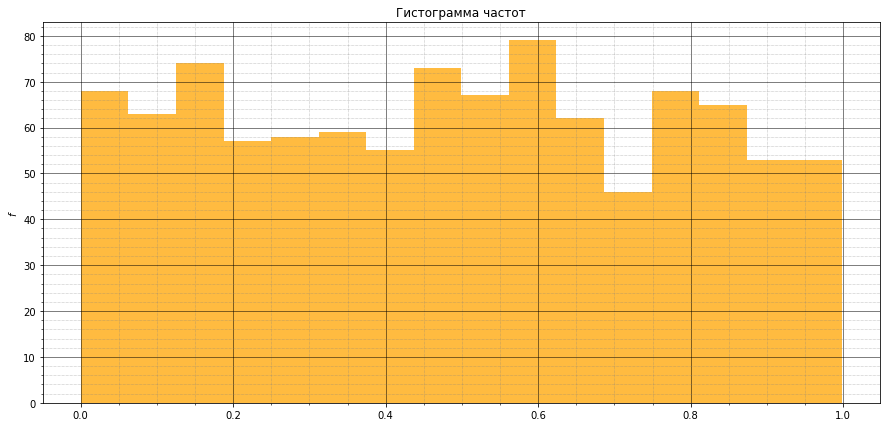

In [9]:
# Гистограмма частот
plt.hist(values, bins=N, facecolor='orange', alpha=0.75)
plt.title('Гистограмма частот');
plt.ylabel('$f$')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()

In [10]:
probabilities = {f"{i / N} - {(i + 1) / N}": 0 for i in range(N)}

for value in values:
    for i in range(N):
        if 0 < value < (i + 1) / N:
            probabilities[f"{i / N} - {(i + 1) / N}"] += 1

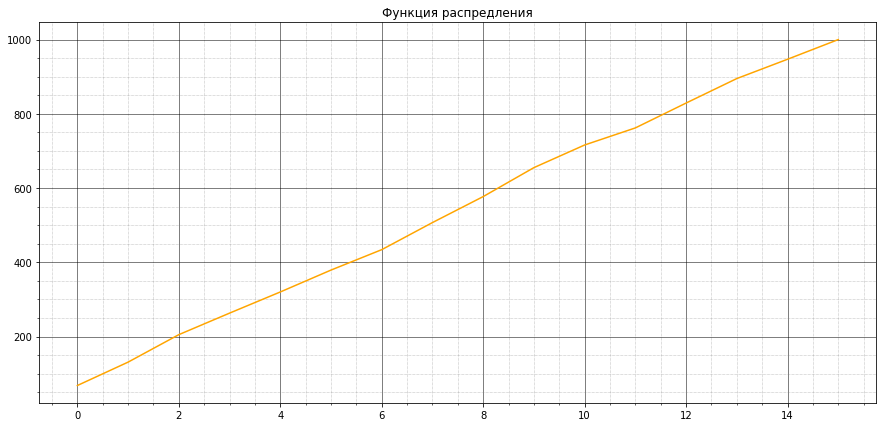

In [11]:
# Функция распределения
plt.plot(list(probabilities.values()), color='orange')
plt.title('Функция распредления')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='black')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='gray')
plt.minorticks_on()
plt.show()